In [149]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyart
import pickle

In [150]:
# Input and output directories
data_path = '/home/pav/repos/vilabella_140530/RESULTS_pkl/'
file_name = 'CDV1405301630_corr.pkl'
in_file = data_path + file_name

shp_path = '/home/pav/repos/vilabella_140530/SHP/'
shp_file_name = 'comarques'
shp_file = shp_path + shp_file_name

# Contour levels (reflectivity)
levels = np.arange(5, 55, 10)

lat_lims = [41.1, 41.9]
lon_lims = [0.45, 1.65]
lat_step = 0.2
lon_step = 0.5

range_rings = list(range(20, 160, 20))
                   
fig_size = [12, 10]

sweep = 0

In [151]:
lat_ticks = np.arange(np.floor(lat_lims[0]), np.ceil(lat_lims[1]), lat_step)
lon_ticks = np.arange(np.floor(lon_lims[0]), np.ceil(lon_lims[1]), lon_step)

In [152]:
# Custom colormap for velocity
cmap = plt.get_cmap('jet',31)
cmaplist = [cmap(i) for i in list(range(1,14))+list(range(19,31))]
cmaplist[12] = (1,1,1,1)
# create the new map
cmap_vel = cmap.from_list('Custom cmap', cmaplist, cmap.N)
cmap_vel.set_bad('lightgrey',1.)

In [153]:
with open(in_file, "rb") as i_file:
    radar = pickle.load(i_file)

In [154]:
sw_slice = radar.get_slice(sweep)

In [155]:
# SPECKLE FILTER: Boundary management for speckle filter is not working (not applied: delta=0)
speckle_z = pyart.correct.despeckle_field(radar, 'reflectivity', delta=0)
mask_z = speckle_z.gate_excluded
speckle_z._merge(mask_z, 'or', True)
radar.fields['reflectivity']['data'].mask = mask_z

speckle_v = pyart.correct.despeckle_field(radar, 'velocity_corr_cmean', delta=0)
mask_v = speckle_v.gate_excluded
speckle_v._merge(mask_v, 'or', True)
radar.fields['velocity_corr_cmean']['data'].mask = mask_v


In [156]:
# get data
data = radar.get_field(sweep, 'reflectivity')

# smooth out the lines
data = sp.ndimage.gaussian_filter(data, sigma=1.1)

lat = radar.gate_latitude['data'][sw_slice]
lon = radar.gate_longitude['data'][sw_slice]

/home/pav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/pav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/pav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/pav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/pav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: T

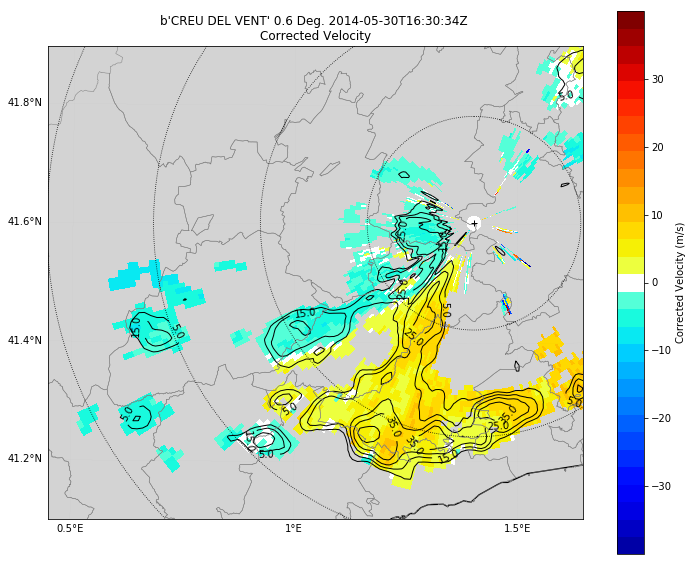

In [157]:
display = pyart.graph.RadarMapDisplay(radar)

v_ny = radar.instrument_parameters['nyquist_velocity']['data'][0]

fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(111)

# plot
display.plot_ppi_map('velocity_corr_cmean', sweep, vmin=-v_ny, vmax=v_ny, projection='lcc',
                     resolution='h', fig=fig, ax=ax, cmap=cmap_vel,
                     min_lon=lon_lims[0], max_lon=lon_lims[1], min_lat=lat_lims[0], max_lat=lat_lims[1],
                     lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
# Display cross in the radar location        
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], symbol='+', color='k')

x, y = display.basemap(lons, lats)
contours = display.basemap.contour(x, y, data, levels, colors='k', linewidths=1.)

#ax.set_xlabel('latitude')
# adds contour labels (fmt= '%r' displays 10.0 vs 10.0000)
plt.clabel(contours, levels, fmt='%r', inline=True, fontsize=10)

# plot range rings
display.plot_range_rings(range_rings, ax=None, col='k', ls=':', lw=0.8)

# Indicate the radar location with a point
display.basemap.readshapefile(shp_file, 'comarques', color='grey')

display.basemap.drawparallels(lat_ticks, labels=[True, False, False, False], linewidth=0.01)
display.basemap.drawmeridians(lon_ticks, labels=[False, False, False, True], linewidth=0.01)


plt.show()

In [158]:
cbar = display.cbs

In [159]:
cbar

In [169]:
cbar

AttributeError: 'list' object has no attribute 'keys'